## Hypothesis Testing 

#### Answer the following Questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?



#### For each question, make sure to:

- State your Null Hypothesis and Alternative Hypothesis
- Select the correct test according to the data type and number of samples
- Test the assumptions of your selected test.
- Execute the selected test, or the alternative test (if you do not meet the assumptions)
- Interpret your p-value and reject or fail to reject your null hypothesis 
- Show a supporting visualization that helps display the result


In [1]:
#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv("/Users/kass/Desktop/CodingDojo/04-DataEnrichment/Week15/Data/Hypothesis_Testing.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Q1 Do smokers have higher insurance charges than non-smokers?

- State your Null Hypothesis and Alternative Hypothesis
    - H0: There is no difference between insurance charges of smokers and no smokers
    - H1: There is a difference between insurance charges of smokers and no smokers
- Select the correct test according to the data type and number of samples
    - T test, comparing two samples
- Test the assumptions of your selected test.
     - Done
- Execute the selected test, or the alternative test (if you do not meet the assumptions)
    - Done
- Interpret your p-value and reject or fail to reject your null hypothesis 
   - Reject null, the p value is smaller than .05
- Show a supporting visualization that helps display the result
    

In [4]:
# see how many with and without smoking
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [5]:
# Filtering out those with and without smoking
smoker_df = df.loc[df['smoker'] == "yes"]
no_smoker_df = df.loc[df['smoker']== "no" ]

In [6]:
#make sure the data is correct
smoker_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       274 non-null    int64  
 1   sex       274 non-null    object 
 2   bmi       274 non-null    float64
 3   children  274 non-null    int64  
 4   smoker    274 non-null    object 
 5   region    274 non-null    object 
 6   charges   274 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 17.1+ KB


In [7]:
# inlcude point of interest with the two groups
smoker_charges = smoker_df['charges']
no_smoker_charges = no_smoker_df['charges']

In [8]:
# Independent t-test with equal_var set to False
result_smoker = stats.ttest_ind(smoker_charges, no_smoker_charges, equal_var = False)
result_smoker

Ttest_indResult(statistic=32.751887766341824, pvalue=5.88946444671698e-103)

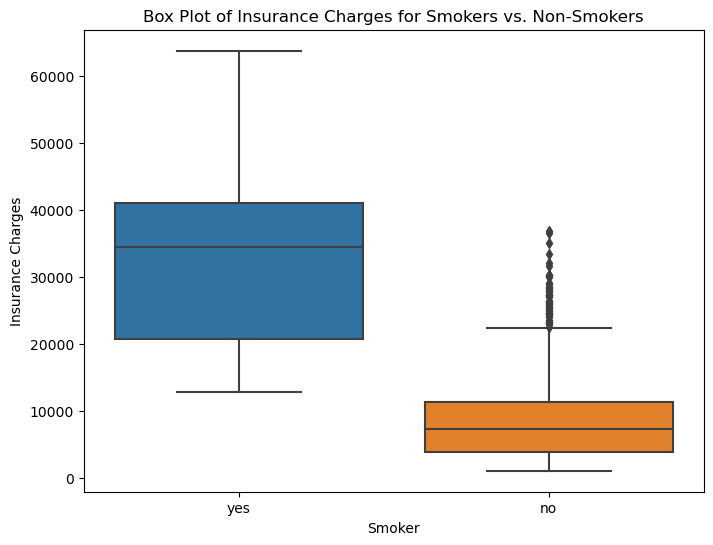

In [9]:
# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.xlabel('Smoker')
plt.ylabel('Insurance Charges')
plt.title('Box Plot of Insurance Charges for Smokers vs. Non-Smokers')
plt.show()


#### Q2. Are men more likely to smoke than women?

- State your Null Hypothesis and Alternative Hypothesis
    - H0: There is no difference between in the likely hood of men smoking vs women smoking
    - H1: There is a difference between in the likely hood of men smoking vs women smoking
- Select the correct test according to the data type and number of samples
    - Chi-Sqaure
- Test the assumptions of your selected test.
    - Done
- Execute the selected test, or the alternative test (if you do not meet the assumptions)
    - Done 
- Interpret your p-value and reject or fail to reject your null hypothesis 
   - Reject null, the p value is smaller than .05
- Show a supporting visualization that helps display the result

In [10]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [11]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [12]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

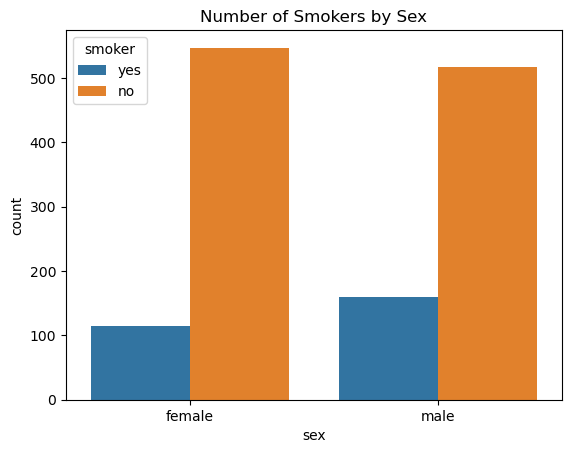

In [13]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of Smokers by Sex");

#### Q3. Do different regions have different charges, on average?
- State your Null Hypothesis and Alternative Hypothesis
    - H0: There is no difference between different regions have different charges, on average
    - H1: There is a difference between different regions have different charges, on average
- Select the correct test according to the data type and number of samples
    - ANOVA
- Test the assumptions of your selected test.
   - Done
- Execute the selected test, or the alternative test (if you do not meet the assumptions)
   - Done
- Interpret your p-value and reject or fail to reject your null hypothesis 
   - reject the null as p is less than .05. This means there is a difference betwen groups with charges. Post Hoc shows there is a sig diff only between southeast and southwest
- Show a supporting visualization that helps display the result

In [14]:
## Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [16]:
# with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

In [15]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway( *groups.values())
result

### this test shows it does not have equal assumptions and ANOVA should not be heavily relied on

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

In [17]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values 
values = df['charges']
labels = df['region']

In [18]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


Text(0.5, 1.0, 'Charges by Region')

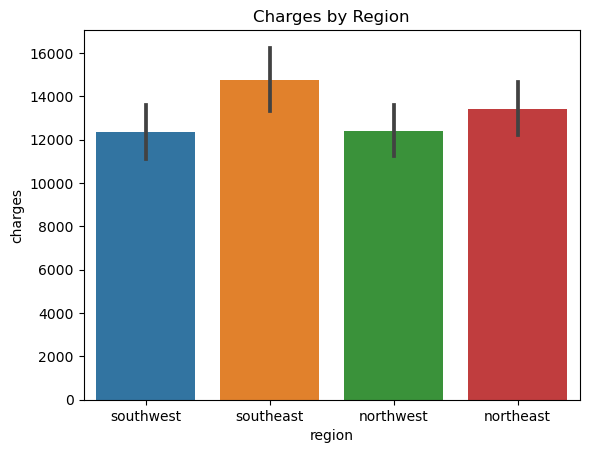

In [16]:
sns.barplot(data=df, x='region',y='charges');
plt.title('Charges by Region')